

Description
This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

dataset: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

Hours_Studied:	Number of hours spent studying per week.

Attendance:	Percentage of classes attended.

Parental_Involvement:	Level of parental involvement in the student's education (Low, Medium, High).

Access_to_Resources	:Availability of educational resources (Low, Medium, High).

Extracurricular_Activities:	Participation in extracurricular activities (Yes, No).

Sleep_Hours:	Average number of hours of sleep per night.

Previous_Scores:	Scores from previous exams.

Motivation_Level:	Student's level of motivation (Low, Medium, High).

Internet_Access:	Availability of internet access (Yes, No).

Tutoring_Sessions:	Number of tutoring sessions attended per month.

Family_Income:	Family income level (Low, Medium, High).

Teacher_Quality:	Quality of the teachers (Low, Medium, High).

School_Type:	Type of school attended (Public, Private).

Peer_Influence:	Influence of peers on academic performance (Positive, Neutral, Negative).

Physical_Activity: Average number of hours of physical activity per week.

Learning_Disabilities:	Presence of learning disabilities (Yes, No).

Parental_Education_Level:	Highest education level of parents (High School, College, Postgraduate).

Distance_from_Home:	Distance from home to school (Near, Moderate, Far).

Gender:	Gender of the student (Male, Female).

Exam_Score:	Final exam score.



In [245]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [246]:
df=pd.read_csv("StudentPerformanceFactors.csv")

# STEP-1 UNDERSTANDING DATA

In [247]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [248]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [249]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [250]:
df.sample()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
506,16,73,High,Medium,Yes,8,52,Medium,Yes,2,Medium,High,Public,Positive,4,No,College,Near,Female,66


In [251]:
#shape of dataset
print("Number of rows:",df.shape[0],"Number of columns:",df.shape[1])


Number of rows: 6607 Number of columns: 20


In [252]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [253]:
cat_col=[col for col in df.columns if df[col].dtype=="object"]
print(cat_col)

['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


# **STEP-2 Data cleaning**

In [254]:
df.columns[df.isnull().all()]

Index([], dtype='object')

In [255]:
missing_values=df.isnull().sum()
missing_values
print(missing_values[missing_values>0])

Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


In [256]:
(90/6607)*100

1.362191614953837

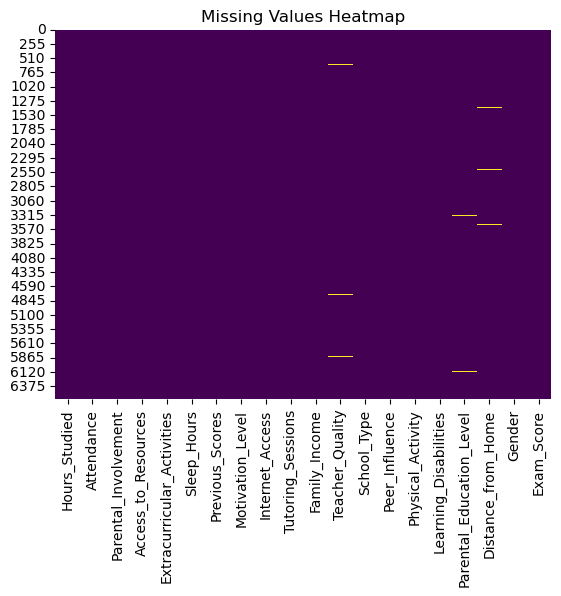

In [257]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [258]:
df['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [259]:
df.dropna(subset=['Teacher_Quality','Parental_Education_Level','Distance_from_Home'],inplace=True)

In [260]:
missing_values=df.isnull().sum()
print(missing_values[missing_values>0])

Series([], dtype: int64)


In [261]:
duplicate=df.duplicated().sum()
print(duplicate[duplicate>0])


[]


In [262]:
import numpy as np
max_score=np.max(df['Exam_Score'])
print('The maximum exam_score is',max_score)
count=0
for i in df['Exam_Score']:
    if i>100:
        count=count+1
    else:
        pass
print('the number of persons with the maximum score is', count)

The maximum exam_score is 101
the number of persons with the maximum score is 1


In [263]:
# here the maximum score is taken as 100, so the value 101 can be replace by value 100
ind=df[df['Exam_Score']>100].index
print('the value ',max_score,'is at',ind)

df.loc[ind,'Exam_Score']=100


the value  101 is at Index([1525], dtype='int64')


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [265]:
# Summary statistics for numerical columns
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6378.000000  6378.000000  6378.000000      6378.000000   
mean       19.977109    80.020853     7.034964        75.066165   
std         5.985460    11.550723     1.468033        14.400389   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        88.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6378.000000        6378.000000  6378.000000  
mean            1.495296           2.972719    67.251960  
std             1.233984           1.028926     3.912884  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [266]:
# Summary statistics for non-numerical columns
print(df.describe(include=object))

       Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6378                6378                       6378   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3251                3204                       3807   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6378            6378          6378            6378   
unique                3               2             3               3   
top              Medium             Yes           Low          Medium   
freq               3237            5893          2582            3826   

       School_Type Peer_Influence Learning_Disabilities  \
count         6378           6378                  6378   
unique           2              3                     2   
top         Public       Positive                    No   
freq   

In [267]:
# df.plot(kind='hist', subplots=True, layout=(5, 8), figsize=(50, 50))
# plt.suptitle('Histplots of Dataset Features', fontsize=50)
# plt.show()

In [268]:
# num_col=df.select_dtypes(include=['int64','float64'])
# for col in num_col:
#   sns.histplot(df[col])
#   plt.title(f'Distribution of {col}')
#   plt.show()
# # sns.histplot(df['Hours_Studied'])
# # plt.title("distribution of hours studied")
# # plt.show()



HOURS STUDIED
* nearly normal distribution
* range is 0-40
* mode is 20
* fairly symmetric distribution

ATTENDENCE
* uniform distribution with a peak at 80
* large no.of individuals have attendence 80 which may be due to cut-off

SLEEP HOURS
* peak at 7 hours
* roughly bell shaped curve
* range is 4-10

PREVIOUS SCORES
* Overall performance: The majority of students performed moderately well on the previous assessment.
* Consistency: There was a fairly consistent level of performance among the students.
* Lack of extreme scores: There were no significant outliers that would suggest a small group of students performed exceptionally well or poorly.


TUTORING SESSION
* rightly skewed
* Peak at 1

PHYSICAL ACTIVITY
* Overall activity: The majority of individuals engage in a moderate level of physical activity.
* Variation: There is a significant amount of variation in physical activity levels, with a small number of individuals engaging in much higher levels.


EXAM SCORE
* Overall performance: The majority of students performed moderately well on the exam.
* Consistency: There was a fairly consistent level of performance among the students.
* Lack of extreme scores: There were no significant outliers that would suggest a small group of students performed exceptionally well or poorly.

In [269]:
# sns.barplot(x='Attendance',y='Exam_Score',data=df)
# plt.title("Attendence vs Exam score")
# plt.show()

# FEATURE ENCODING

In [270]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
education_mapping = {
    'High School': 1,
    'College': 2,
    'Postgraduate': 3,
}
lmh={
    'Low':1,
    'Medium':2,
    'High':3
}
dis={
    'Near':1,
    'Moderate':2,
    'Far':3
}

peer={
    'Positive':3,
    'Neutral':2,
    'Negative':1
}

df['Parental_Education_Level']=df['Parental_Education_Level'].map(education_mapping)
df['Parental_Involvement'] =df['Parental_Involvement'].map(lmh)
df['Access_to_Resources'] =df['Access_to_Resources'].map(lmh)
df['Motivation_Level'] =df['Motivation_Level'].map(lmh)
df['Family_Income']=df['Family_Income'].map(lmh)
df['Teacher_Quality']=df['Teacher_Quality'].map(lmh)
df['Distance_from_Home']=df['Distance_from_Home'].map( dis)
df['Peer_Influence']=df['Peer_Influence'].map(peer)


In [271]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [272]:

df = pd.get_dummies(df,columns=['Extracurricular_Activities','Internet_Access','School_Type','Learning_Disabilities','Gender'],dtype=int,drop_first=True)


In [273]:
df.shape

(6378, 20)

In [274]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,1,3,7,73,1,0,1,2,3,3,1,1,67,0,1,1,0,1
1,19,64,1,2,8,59,1,2,2,2,1,4,2,2,61,0,1,1,0,0
2,24,98,2,2,7,91,2,2,2,2,2,4,3,1,74,1,1,1,0,1
3,29,89,1,2,8,98,2,1,2,2,1,4,1,2,71,1,1,1,0,1
4,19,92,2,2,6,65,2,3,2,3,2,4,2,1,70,1,1,1,0,0


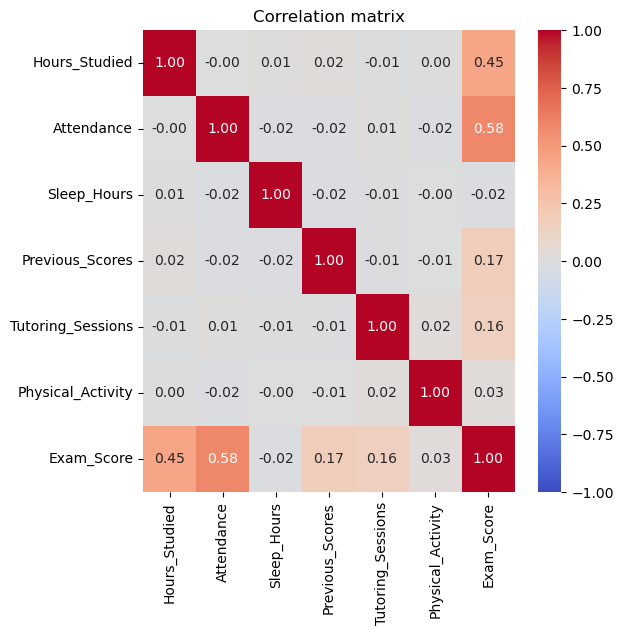

In [275]:
# num_col=df.select_dtypes(include=['int64','float64'])
df1=df[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']]
cor_matrix=df1.corr()
plt.figure(figsize=(6,6))
sns.heatmap(cor_matrix,vmin=-1,vmax=1,cmap="coolwarm",annot=True,fmt='0.2f',robust=True)
plt.title("Correlation matrix")
plt.show()

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df.values,i)for i in range (df.shape[1])]
vif['feature']=df.columns
print(vif)

           VIF                         feature
0    18.518615                   Hours_Studied
1   100.403683                      Attendance
2    11.109025            Parental_Involvement
3    11.196775             Access_to_Resources
4    22.586142                     Sleep_Hours
5    31.551010                 Previous_Scores
6     8.812910                Motivation_Level
7     2.636450               Tutoring_Sessions
8     7.050185                   Family_Income
9    14.667056                 Teacher_Quality
10    9.749073                  Peer_Influence
11    9.369365               Physical_Activity
12    5.986087        Parental_Education_Level
13    5.886061              Distance_from_Home
14  520.714952                      Exam_Score
15    2.525386  Extracurricular_Activities_Yes
16   13.271618             Internet_Access_Yes
17    3.270577              School_Type_Public
18    1.123398       Learning_Disabilities_Yes
19    2.365742                     Gender_Male


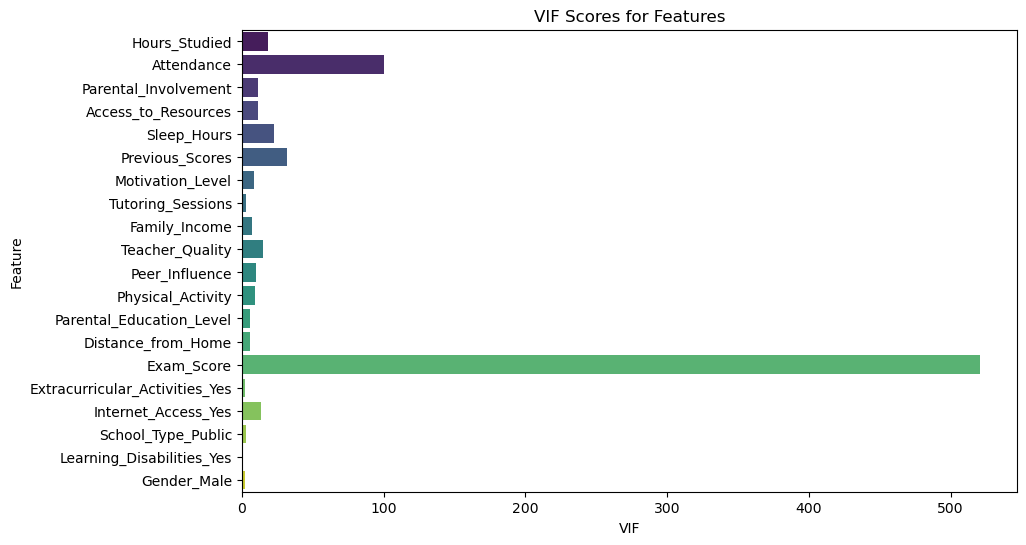

In [277]:
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="feature", data=vif, palette="viridis")
plt.title("VIF Scores for Features")
plt.xlabel("VIF")
plt.ylabel("Feature")
plt.show()


# OUTLIER DETECTION

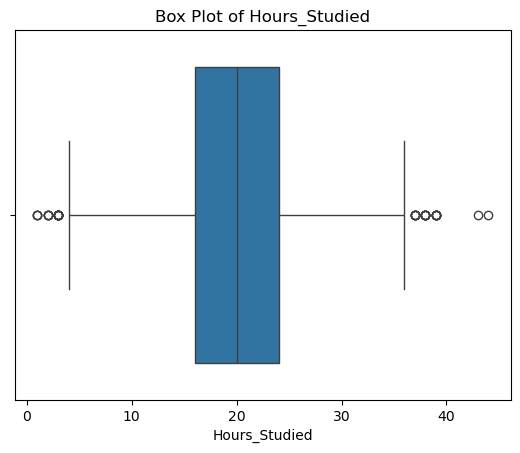

In [100]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['Hours_Studied'])
plt.title('Box Plot of Hours_Studied')
plt.show()

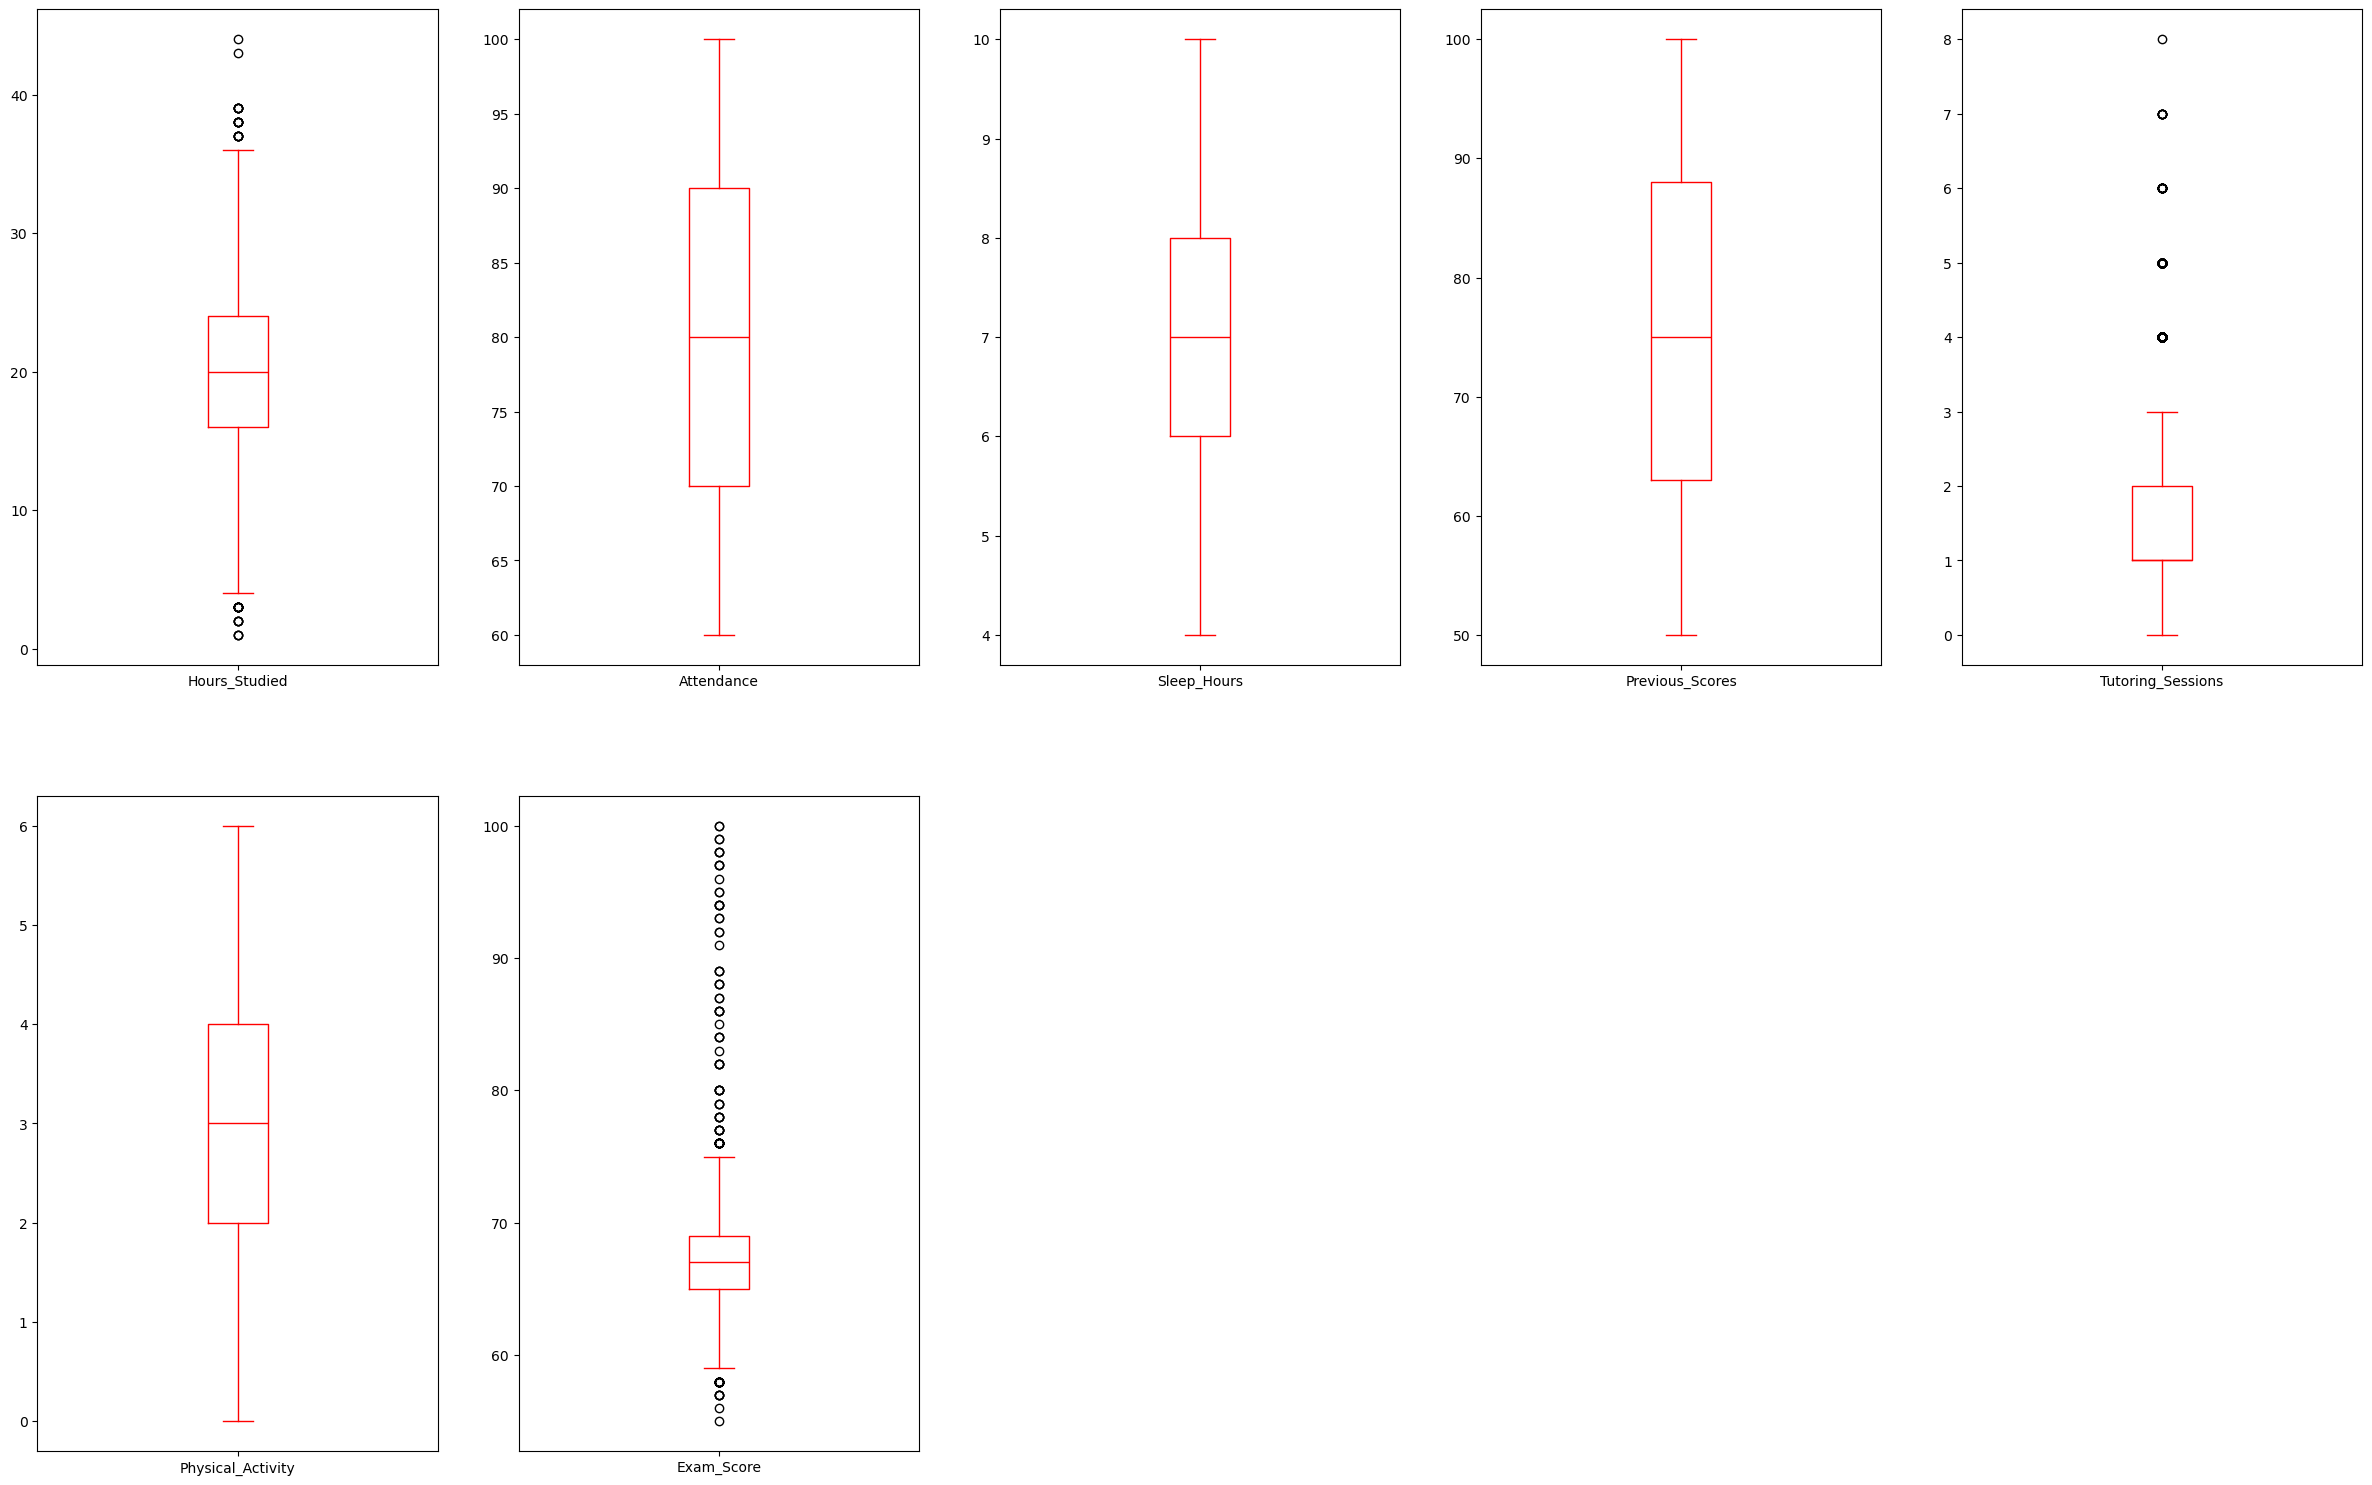

In [278]:
df1.plot(kind='box', subplots=True, layout=(8, 5), figsize=(30, 80), color='red')
plt.title('Boxplots of Dataset Features')
plt.show()

In [280]:
df['Hours_Studied'].value_counts()

Hours_Studied
20    448
19    425
21    420
18    393
23    389
22    386
17    370
24    343
16    337
15    303
25    281
14    257
26    255
27    217
13    213
12    189
28    169
11    140
29    131
30    119
10     91
9      79
31     75
8      55
32     54
7      51
33     37
34     27
5      21
35     20
6      17
4      16
3      12
36     10
38      7
37      6
39      6
2       4
1       3
43      1
44      1
Name: count, dtype: int64

In [183]:
df.skew()

Hours_Studied                     0.016225
Attendance                        0.005663
Parental_Involvement             -0.116175
Access_to_Resources              -0.136403
Sleep_Hours                      -0.026814
Previous_Scores                  -0.001362
Motivation_Level                  0.125891
Tutoring_Sessions                 0.825261
Family_Income                     0.362800
Teacher_Quality                  -0.111383
Peer_Influence                   -0.333762
Physical_Activity                -0.037055
Parental_Education_Level          0.566676
Distance_from_Home                0.979431
Exam_Score                        1.665831
Extracurricular_Activities_Yes   -0.395165
Internet_Access_Yes              -3.199630
School_Type_Public               -0.848312
Learning_Disabilities_Yes         2.582253
Gender_Male                      -0.316928
dtype: float64

In [102]:
# Function to remove outliers using IQR for all numerical columns
def remove_all_outliers_iqr(df, columns):
    df_out = df.copy()  # Create a copy of the DataFrame to avoid modifying the original data

    for column in columns:
        Q1 = df_out[column].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df_out[column].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers from the dataset
        df_out = df_out[(df_out[column] >= lower_bound) & (df_out[column] <= upper_bound)]

    return df_out

# Select numerical columns (you can also explicitly specify them)
numerical_columns = df.select_dtypes(include=['number']).columns

# Apply the function to remove outliers
df_no_outliers = remove_all_outliers_iqr(df, ['Hours_Studied','Tutoring_Sessions'])

# Print shapes of data before and after removing outliers
print("Shape of data before removing outliers:", df.shape)
print("Shape of data after removing outliers:", df_no_outliers.shape)
print("Number of outliers removed:", df.shape[0] - df_no_outliers.shape[0])

Shape of data before removing outliers: (6378, 20)
Shape of data after removing outliers: (5915, 20)
Number of outliers removed: 463


# FEATURE ENGINEERING

In [103]:
# Create a new feature 'family_size'
df['improved_percentage'] = ((df['Exam_Score'] - df['Previous_Scores'])/df['Previous_Scores'])*100

In [104]:
df_no_outliers

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,2,3,0,1,1,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,2,2,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,3,1,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,2,1,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,1,4,0,2,1,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,2,0,7,76,2,1,1,3,2,1,2,2,0,1,1,0,68
6603,23,76,3,2,0,8,81,2,1,3,1,3,1,2,2,0,1,1,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,3,1,0,68
6605,10,86,3,3,1,6,91,3,1,2,1,2,0,2,3,0,1,3,0,68


In [105]:
# importing required libraries for model prediction
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error,mean_absolute_error

In [ ]:
# Define features and target variable
x=df_no_outliers.drop('Exam_Score',axis=1)
y=df_no_outliers['Exam_Score']

In [108]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
x_scaled = minmax_scaler.fit_transform(x)

# INITIAL MODELLING

In [128]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Train a baseline logistic regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Rmse:{rmse}')


Mean Squared Error: 5.855398878930449
R-squared: 0.64041454513146
Rmse:2.4197931479633645


In [125]:
x_scaled.shape

(5915, 19)

In [127]:
y.shape

(5915,)

In [130]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'improved_percentage'],
      dtype='object')

In [129]:
from sklearn.feature_selection import RFE
s=RFE(model,step=1)
s=s.fit(x_scaled,y)
print(s.ranking_)
print(s.support_)



[ 1  1  1  1  8 11  1  1  5  1  3  1  9  1  2  7  4  6 10]
[ True  True  True  True False False  True  True False  True False  True
 False  True False False False False False]


In [110]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [111]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

results={}

In [115]:
import numpy as np

In [116]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

In [119]:
print(pd.DataFrame(results).T)

                               MAE      RMSE        R²
Linear Regression         0.543558  2.419793  0.640415
Ridge Regression          0.543783  2.419247  0.640577
Lasso Regression          2.890615  4.036054 -0.000367
ElasticNet Regression     2.846296  3.995777  0.019499
Decision Tree             1.795435  3.691850  0.162984
Random Forest             1.171285  2.672280  0.561460
Gradient Boosting         0.905615  2.532150  0.606247
Support Vector Regressor  0.633459  2.453374  0.630365
K-Nearest Neighbors       2.065934  3.326646  0.320391
Neural Network            0.566245  2.425429  0.638738


# **STEP-11 DOCUMENTATION AND REPORTING**

In [47]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum()
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

EDA Summary:
Dataset Shape: (6607, 28)
Missing Values: 0


In [48]:
# # Convert results to a DataFrame for better visualization
# results_df = pd.DataFrame(results).T
# print(results_df)